## Importing Libraries and Data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [3]:
all_sentiment_df = pd.read_csv('../../data/01-modified-data/all_teams_sentiment_df.csv')

In [12]:
grouped_df = all_sentiment_df.groupby(['Team', 'sentiment'], as_index = False)['0'].count() # Group by team and sentiment

## Pie Chart of Sentiment Percentage Distribution of every Team

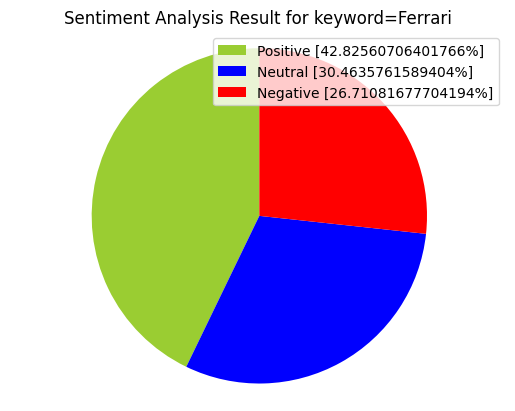

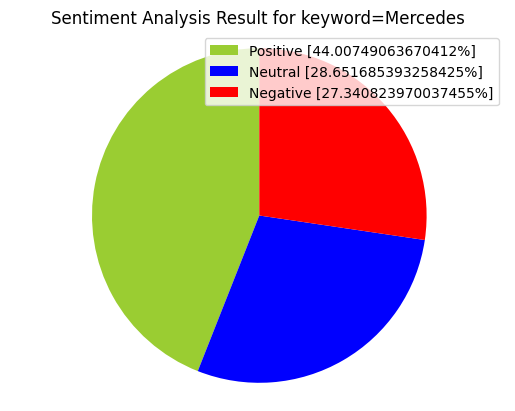

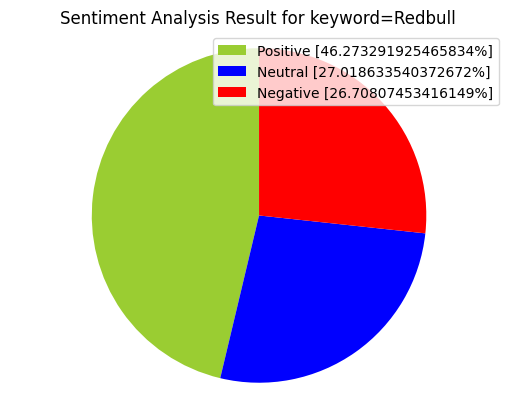

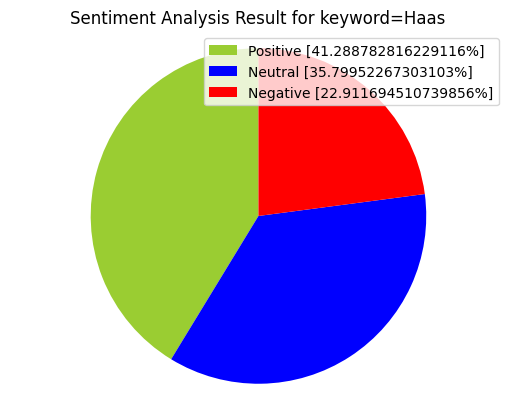

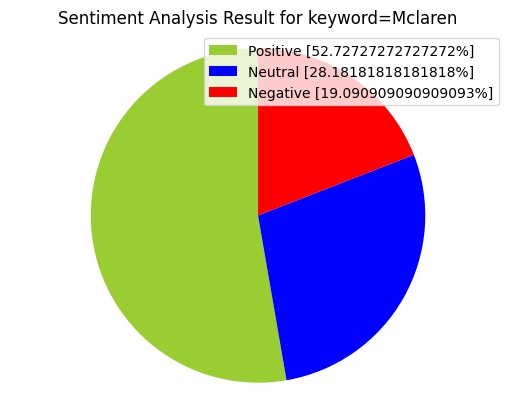

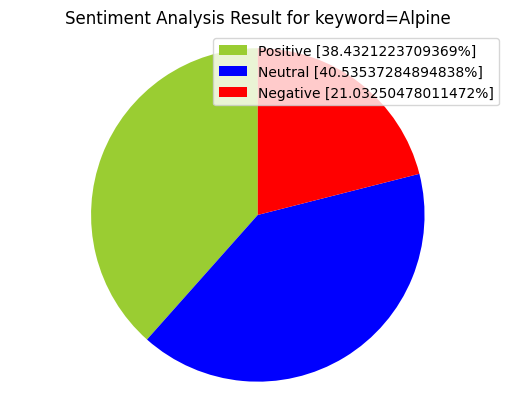

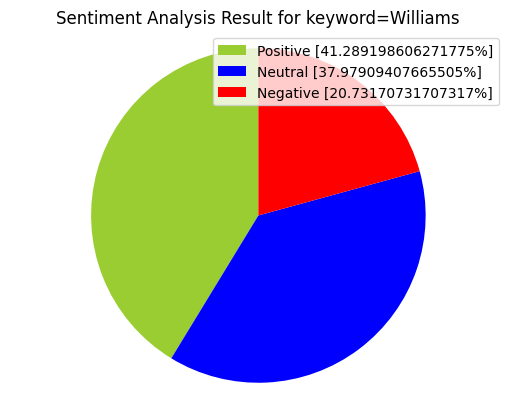

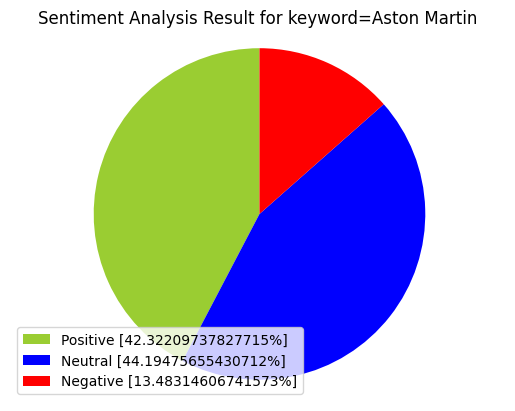

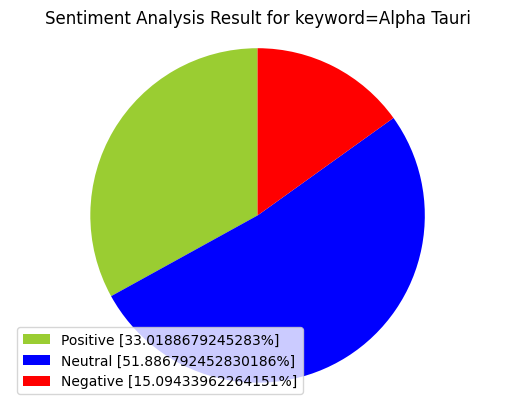

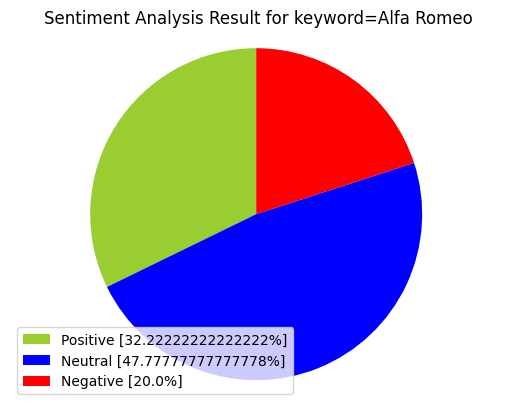

In [21]:
teams = ['Ferrari', 'Mercedes', 'Redbull', 'Haas', 'Mclaren', 'Alpine', 'Williams', 'Aston Martin', 'Alpha Tauri', 'Alfa Romeo']

for team in teams:
    
    indiv_df = grouped_df[grouped_df['Team'] == team]
    indiv_df = indiv_df.rename(columns = {'0': 'Count'})
    #indiv_df = indiv_df.pivot(index = 'Team', columns = 'sentiment', values = 'Count')
    #display(indiv_df)
    
    positive_percentage = (indiv_df[indiv_df['sentiment'] == 'positive']['Count'].values[0] / indiv_df['Count'].sum()) * 100
    negative_percentage = (indiv_df[indiv_df['sentiment'] == 'negative']['Count'].values[0] / indiv_df['Count'].sum()) * 100
    neutral_percentage = (indiv_df[indiv_df['sentiment'] == 'neutral']['Count'].values[0] / indiv_df['Count'].sum()) * 100
    
    positive = indiv_df[indiv_df['sentiment'] == 'positive']['Count'].values[0]
    negative = indiv_df[indiv_df['sentiment'] == 'negative']['Count'].values[0]
    neutral = indiv_df[indiv_df['sentiment'] == 'neutral']['Count'].values[0]
    
    labels = ["Positive ["+str(positive_percentage)+"%]" , "Neutral ["+str(neutral_percentage)+"%]","Negative ["+str(negative_percentage)+"%]"]
    sizes = [positive, neutral, negative]
    colors = ['yellowgreen', 'blue','red']
    patches, texts = plt.pie(sizes,colors=colors, startangle=90)
    plt.style.use('default')
    plt.legend(labels)
    plt.title("Sentiment Analysis Result for keyword=" + team)
    plt.axis('equal')
    plt.savefig('../../501-project-website/images/visualizations/sentiment_analysis/' + team + '_pie.png')
    plt.show()

## Worldcloud of each Team

In [25]:
def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                    max_words=3000,
                    stopwords=stopwords,
                    repeat=True)
    wc.generate(str(text))
    wc.to_file("../../501-project-website/images/visualizations/sentiment_analysis/" + team + "_wordcloud.png")
    print("Word Cloud Saved Successfully")
    path="../../501-project-website/images/visualizations/sentiment_analysis/" + team + "_wordcloud.png"
    display(Image.open(path))

Word Cloud Saved Successfully


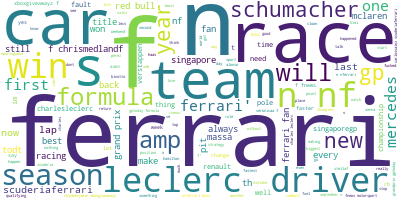

Word Cloud Saved Successfully


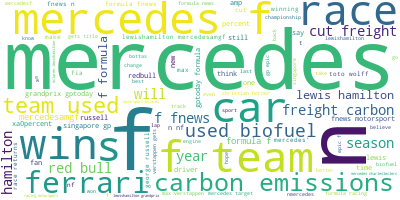

Word Cloud Saved Successfully


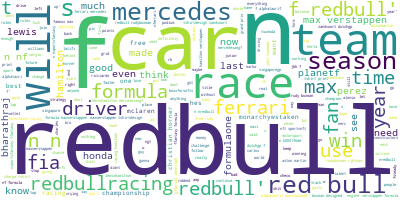

Word Cloud Saved Successfully


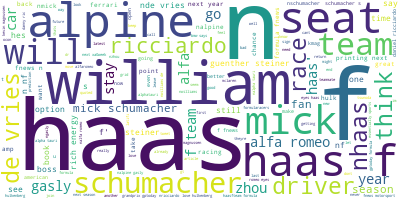

Word Cloud Saved Successfully


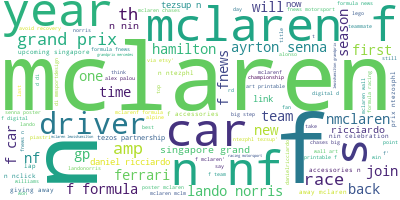

Word Cloud Saved Successfully


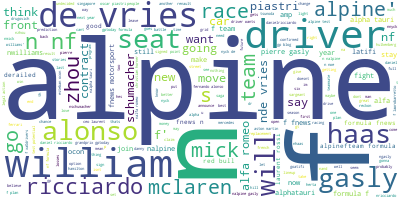

Word Cloud Saved Successfully


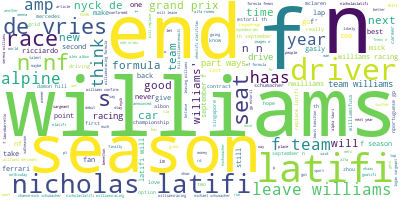

Word Cloud Saved Successfully


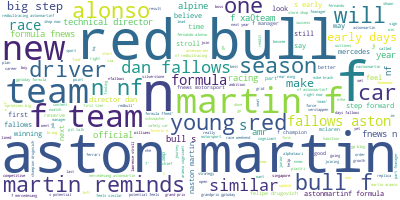

Word Cloud Saved Successfully


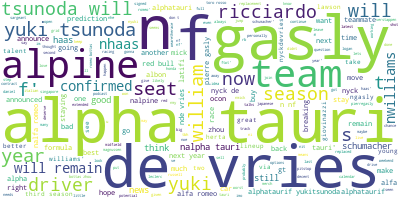

Word Cloud Saved Successfully


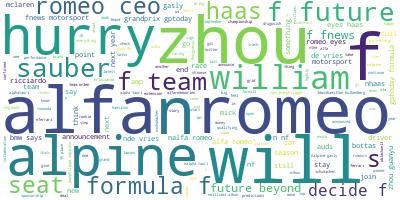

In [26]:
for team in teams:
    
    indiv_df = all_sentiment_df[all_sentiment_df['Team'] == team]
    create_wordcloud(indiv_df["text"].values)
    

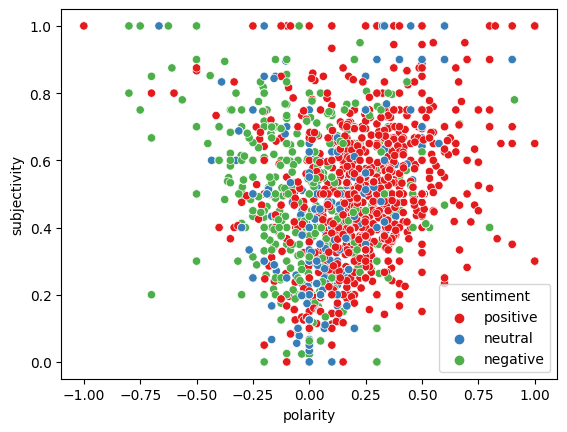

In [90]:
sns.scatterplot(data = all_sentiment_df, x = 'polarity', y = 'subjectivity', hue = 'sentiment', palette = 'Set1')
plt.savefig('../../501-project-website/images/visualizations/sentiment_analysis/scatterplot_polarity_vs_subjectivity.png')
plt.show()

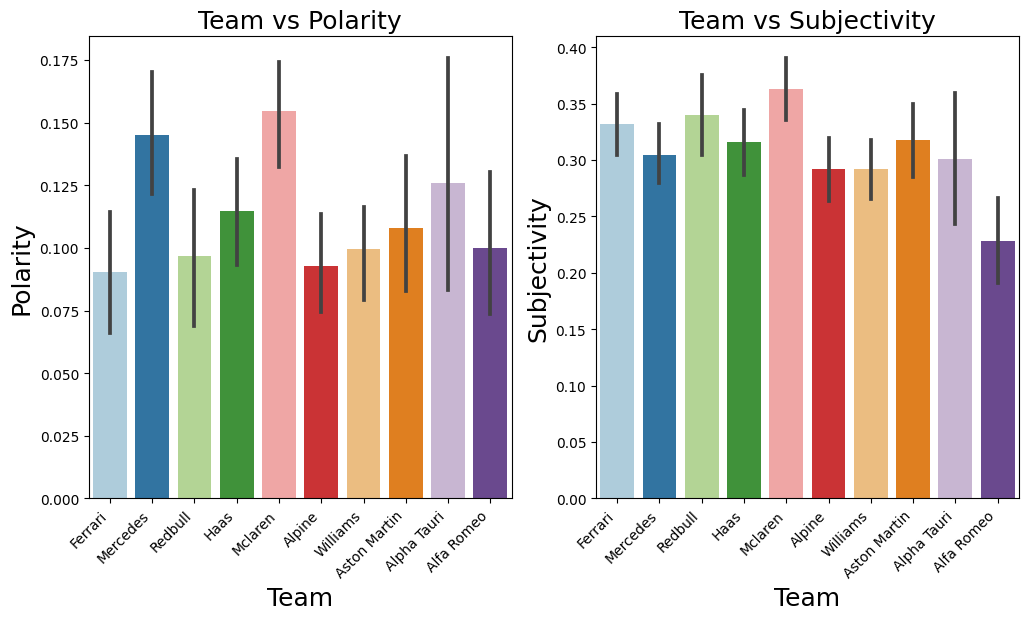

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize = (12, 6))

sns.barplot(x = 'Team', y = 'polarity', data = all_sentiment_df, ax = ax[0], palette = 'Paired')
sns.barplot(x = 'Team', y = 'subjectivity', data = all_sentiment_df, ax = ax[1], palette='Paired')

FS = 18
ax[0].set_title('Team vs Polarity', fontsize = FS)
ax[1].set_title('Team vs Subjectivity', fontsize = FS)
ax[0].set_xlabel('Team', fontsize = FS)
ax[0].set_ylabel('Polarity', fontsize = FS)
ax[1].set_xlabel('Team', fontsize = FS)
ax[1].set_ylabel('Subjectivity', fontsize = FS)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.savefig('../../501-project-website/images/visualizations/sentiment_analysis/Team_vs_Polarity_Subjectivity.png')
plt.show()

In [70]:
sns.scatterplot(data = all_sentiment_df[all_sentiment_df['Team'] == 'Ferrari'], x = 'polarity', y = 'polarity', hue = 'Team', palette = 'Set1')

<AxesSubplot:xlabel='Team', ylabel='polarity'>